# Processamento dos Dados e Análise Exploratória dos Dados

Nessa aula, iremos tratar dos seguintes conteúdos:
- Processamento de Dados;
- Análise Exploratória dos Dados;
- Exercícios.

## 

## 1. Processamento dos Dados

O processamento dos dados é uma fundamental etapa que impacta diretamente a __qualidade dos resultados da modelagem__. A princípio vamos imaginar um modelo de _Machine Learning_ como uma __caixa preta__ (em inglês _black-box_), onde ele irá receber dados, vai ocorrer algum processo matemático ali dentro do modelo e depois será devolvido um resultado para avaliarmos.

<br>

<img src = "https://qph.cf2.quoracdn.net/main-qimg-cdc82f8af6f096331ae790ace3352541" width = 500>

fonte: [Quora](https://www.quora.com/Are-most-machine-learning-models-black-boxes)

<br>

Se o modelo receber dados ruins ou com qualidade duvidosa, os resultados serão de mesma magnitude ruins ou duvidosos. Então, é importante que seja feito um trabalho de limpeza e processamento dos dados para garantir que estão apropriados para o uso.

Abaixo, vamos listar alguns tópicos sobre pontos relevantes a se avaliar nos dados, não necessariamente vão precisar fazer todos eles e também não são os únicos procedimnetos que podem serem feitos! Mas no geral, resolvem boa parte dos problemas que os dados podem apresentar.

<br><br>

### 1.1 Remoção de Duplicatas

<br>

A redundância no conjunto de dados pode acontecer por diversos fatores como por exemplo problemas na aquisição e armazenamento deste dados, alta correlação entre uma ou mais variáveis entre outras. No caso de tabelas (ou generalizando, em conjunto de dados estruturados), quando fala-se sobre dados __duplicados__ indica-se que um ou mais rgistros (linhas) têm valores nos atributos que coincidem (ou seja, todos valores nas colunas são iguais entre estas linhas).

O efeito que dados duplicados podem causar nos modelos de _Machine Learning_ tendencionar o resultado do modelo em uma direção, em outras palavras, adicionar um __viés__ que possa impactar no resultado do modelo.

<br>

Vamos avaliar a questão de dados duplicado na base de dados `COVID.csv`, sobre casos de COVID registrados no México em 2020:

In [1]:
# Carrega as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carrega o conjunto de dados
covid = pd.read_csv('datasets/COVID.csv', index_col = 0)

In [3]:
# Mostra algumas linhas do conjunto de dados
covid.head(10)

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,1,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,54,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,1,30,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,60,0,1,0,0,0,1,0,1,0,0,0,0,1,0
5,0,0,0,1,47,0,1,0,0,0,0,0,0,0,0,0,0,1,1
6,0,0,0,0,63,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7,1,1,0,0,56,0,0,0,0,0,1,0,0,0,1,1,1,1,0
8,1,1,0,0,41,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,1,0,1,1,39,0,0,0,0,0,0,0,0,1,0,0,0,1,0


Uma forma de identificar as duplicadas é a partir da função `duplicated` do _Pandas_:

In [4]:
# Marcando as duplicatas
covid.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
499687    False
499688    False
499689     True
499690     True
499691     True
Length: 499692, dtype: bool

In [5]:
# Filtrando os dados duplicados
covid[covid.duplicated()]

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
22,1,1,0,0,45,0,0,0,0,0,0,0,0,0,0,0,0,1,0
27,0,1,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,1,0
62,0,1,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,1,0
70,1,1,0,0,33,0,0,0,0,0,0,0,0,0,0,0,0,1,0
76,1,1,0,0,38,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499685,1,1,0,0,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0
499686,1,1,0,0,15,0,0,0,0,0,0,0,0,0,0,0,1,0,0
499689,1,1,0,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0
499690,1,1,0,0,45,0,0,0,0,0,1,0,0,0,0,0,1,0,0


Para __remover__ os dados duplicados basta utilizar a função `drop_duplicates` do _Pandas_:

In [6]:
# Removendo os dados duplicados
covid2 = covid.drop_duplicates(keep='first')

In [7]:
# Visualizando os dados
covid2.head(15)

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,1,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,54,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,1,30,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,60,0,1,0,0,0,1,0,1,0,0,0,0,1,0
5,0,0,0,1,47,0,1,0,0,0,0,0,0,0,0,0,0,1,1
6,0,0,0,0,63,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7,1,1,0,0,56,0,0,0,0,0,1,0,0,0,1,1,1,1,0
8,1,1,0,0,41,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,1,0,1,1,39,0,0,0,0,0,0,0,0,1,0,0,0,1,0


A pergunta agora é, neste caso deveria ser removido os dados duplicados?

Vamos acompanhar as bases antes e depois da remocão:

In [8]:
covid.shape

(499692, 19)

In [9]:
covid2.shape

(59577, 19)

In [10]:
((covid.shape[0] - covid2.shape[0])/covid.shape[0])*100

88.0772555894431

In [11]:
covid.duplicated().value_counts()

True     440115
False     59577
dtype: int64

Este exemplo é bom para salientar que para fazer qualquer tipo de procedimento nos dados, deve-se __conhecer bem os dados__, como eles foram concebidos e suas peculiaridades!

No caso dessa base de dados sobre o COVID, os registros são de pacientes distintos e por mais que tenha dados duplicados isso se deve por boa parte dos atributos serem dados categóricos.

<br><br>

### 1.2 Remoção e/ou Preenchimento de Dados Faltantes

<br>

Ao se trabalhar com dados, um ods principais problemas no processo de tratamento e limpeza dos dados é lidar com dados faltantes. Muito desses dados faltantes surgiram devido a alguma falha de transposição dos dados (de um banco de dados a outro), falha no preenchimento destes dados ou até mesmo a faltam de preenchimento.

Vamos discutir aqui sobre alguns casos que ocorrem no conjunto de dados `COVID.csv`:

<br>

In [12]:
(covid.isna().sum()/len(covid))*100

sex                    0.0
patient_type           0.0
intubed                0.0
pneumonia              0.0
age                    0.0
pregnancy              0.0
diabetes               0.0
copd                   0.0
asthma                 0.0
inmsupr                0.0
hypertension           0.0
other_disease          0.0
cardiovascular         0.0
obesity                0.0
renal_chronic          0.0
tobacco                0.0
contact_other_covid    0.0
covid_res              0.0
icu                    0.0
dtype: float64

<br><br>

### 1.3 Análise de Outliers

<br>

Os __Outliers__ (também como pontos fora da curva em português) são os pontos discrepantes em relação ao conjunto de dados, sendo identificados como valores muito extremos entre relação ao restante da distribuição. Assim como os casos anteriores é importante avaliar se o _outlier_ deve ser removido do conjunto de dados ou por mais que sejam muito discrepante, ainda sim faz sentido em relação a natureza dos dados. 

Por isso também, é importante existir uma sinergia com a equipe de Ciência de Dados e a área solicitante das análises, pois eles devem conhecer intimamente os dados!

Vamos avaliar os outliers a partir das idades no _dataset_ `COVID.csv`:


In [13]:
# função para os outliers
def detect_outlier_Normal(attribute, epsilon = 0.0001, plotdist = False):
    """Funcao para detectar outliers com base na distribuicao Gaussiana univariada
    Parametros:
        - attribute: vetor de atributos/features
        - epsilon: limiar para rejeitar pontos como pertencendo a distribuicao (default:0.001)
        - plotdist: opcao que permite grafar a distribuicao com os parametros estimados
    Retorno:
        vetor com os índices dos outliers detectados
    """
    mean = np.mean(attribute)
    stdv  = np.std(attribute)
        
    # array vazio
    outliers = []
    # para cada atributo
    for x,i in zip(attribute, range(0, len(attribute))):
        # computa probabilidade
        p_x = np.exp(-(((x-mean)**2)/(2*stdv**2))) / (np.sqrt(2*np.pi)*stdv)
        # limiar para considerar outlier
        if (p_x < epsilon):
            outliers.append(i)
            
    outliers = np.array(outliers)
    
    # opcao para plotar a distribuicao marcando outliers
    if plotdist:
        x = np.arange(int(mean-4*stdv),int(mean+4*stdv),stdv/100.0)
        dist_gauss = np.exp(-(((x-mean)**2)/(2*(stdv**2)))) / (np.sqrt(2*np.pi)*stdv)
        plt.figure()
        plt.plot(x, dist_gauss)
        plt.plot(attribute[outliers], np.zeros(outliers.shape[0]), 'xr')
    
    return outliers

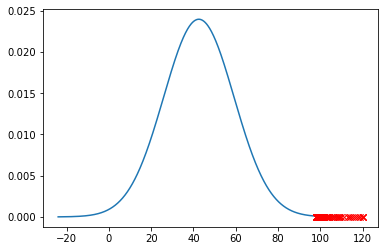

In [14]:
# Gera os outliers e o gráfico da distribuição normal para as idades
outliers = detect_outlier_Normal(covid['age'], plotdist=True)

In [15]:
# Mostrando os outliers
covid.loc[outliers, :]

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
7147,0,1,0,0,98,0,0,0,0,0,0,1,0,0,0,0,0,1,0
8422,1,0,0,1,98,0,0,0,0,0,1,0,0,0,0,0,1,1,0
10019,1,0,1,1,100,0,0,0,0,0,0,0,0,0,0,0,1,1,1
12944,0,1,0,0,98,0,1,0,0,0,1,0,1,0,0,0,1,1,0
13835,1,1,0,0,98,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494584,0,0,0,1,98,0,0,0,0,0,0,0,0,0,0,1,0,0,0
498130,1,0,0,0,99,0,0,0,0,0,1,0,0,1,0,0,0,0,0
498161,0,0,0,1,99,0,1,0,0,0,0,0,0,0,0,0,0,0,0
498203,1,1,0,0,98,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## 

## 2. Análise Exploratória dos Dados

A análise exploratória dos dados (também conhecida como EDA) é um ponto crucial no sentido de conhecer intimamente o conjunto de dados, justamente onde a estatística serve como uma ferramenta poderosa no entendimento dos dados sendo:

<br>

- Levantando as estatísticas sobre os atributos do conjunto de dados;
- Criando gráficos, box-plots e visualizações que auxiliem no entendimento;
- Testes de Hipóteses para avaliar alguma condição específica (por exemplo separabilidade dos dados).

<br>

Não existe receita de bolo para a questão da EDA, dependendo muito dos dados e também do tipo de abordagem que o cientista de dados gosta de seguir. Vamos colocar um pouco em prática isso.

<br><br>

## 3. Exercícios

<br>

Utilizando o conjunto de dados `COVID.csv`, desenvolva os itens abaixo:

- __1)__ Faça a limpeza e eventuais preenchimentos, remoções de dados duplicados e outliers de todos os atributos do conjunto de dados;

- __2)__ Desenvolva uma análise exploratória dos dados e tire insights sobre o conjunto de dados.

In [16]:
covid2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59577 entries, 0 to 499688
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   sex                  59577 non-null  int64
 1   patient_type         59577 non-null  int64
 2   intubed              59577 non-null  int64
 3   pneumonia            59577 non-null  int64
 4   age                  59577 non-null  int64
 5   pregnancy            59577 non-null  int64
 6   diabetes             59577 non-null  int64
 7   copd                 59577 non-null  int64
 8   asthma               59577 non-null  int64
 9   inmsupr              59577 non-null  int64
 10  hypertension         59577 non-null  int64
 11  other_disease        59577 non-null  int64
 12  cardiovascular       59577 non-null  int64
 13  obesity              59577 non-null  int64
 14  renal_chronic        59577 non-null  int64
 15  tobacco              59577 non-null  int64
 16  contact_other_covid  

In [17]:
covid2.describe(percentiles = [.25, .5, .75, .95, .99]).round(2).T.style.background_gradient(cmap='PuBu')

,count,mean,std,min,25%,50%,75%,95%,99%,max
sex,59577.000000,0.480000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
patient_type,59577.000000,0.440000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
intubed,59577.000000,0.090000,0.290000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
pneumonia,59577.000000,0.430000,0.490000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
age,59577.000000,53.060000,20.140000,0.000000,39.000000,54.000000,68.000000,84.000000,93.000000,120.000000
pregnancy,59577.000000,0.020000,0.130000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
diabetes,59577.000000,0.360000,0.480000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
copd,59577.000000,0.110000,0.320000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
asthma,59577.000000,0.110000,0.310000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
inmsupr,59577.000000,0.100000,0.310000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000


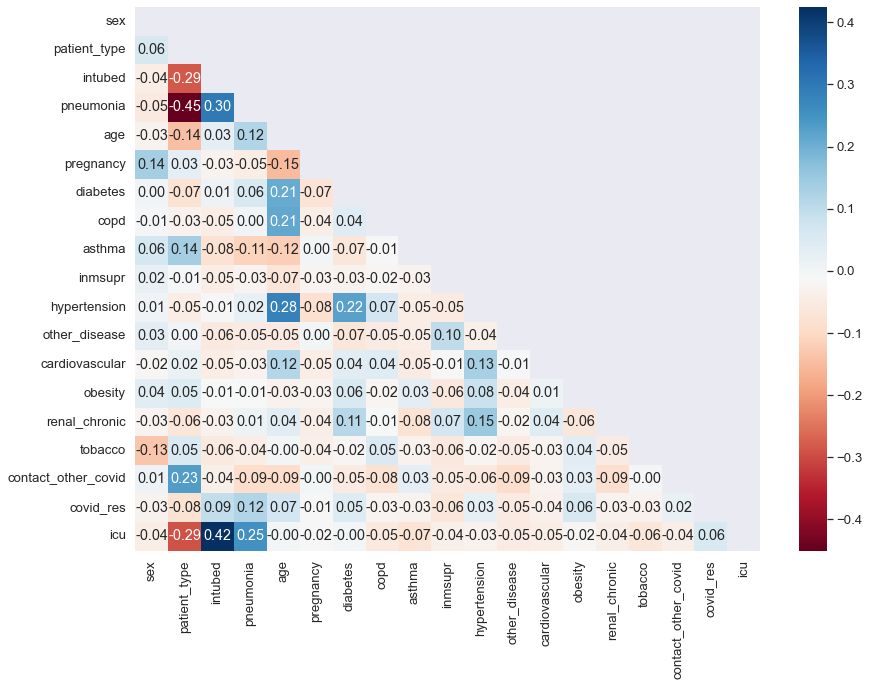

In [22]:
sns.set_context(font_scale=1.9)
plt.figure(figsize=(14,10))
sns.heatmap(
    covid2.corr(), 
    annot=True, 
    fmt='.2f', 
    cmap='RdBu',
    mask=np.triu(
        np.ones_like(covid2.corr()) 
    ) 
);

---